# TEXT EMOTION DETECTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("emotion_dataset_raw.csv")

In [3]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [4]:
df['Emotion'].value_counts()

Emotion
joy         11055
sadness      6732
fear         5420
anger        4307
surprise     4072
neutral      2264
disgust       866
shame         156
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

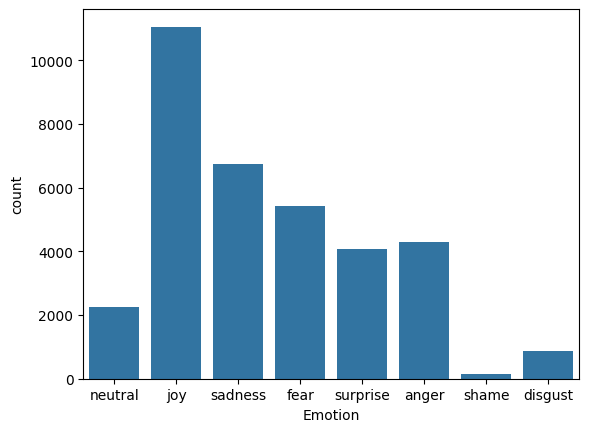

In [5]:
sns.countplot(x='Emotion',data=df)

## Data Pre-processing

In [6]:
import neattext.functions as nfx

#Remove the user handles
df['Clean_text'] = df['Text'].apply(nfx.remove_userhandles)

In [7]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [8]:
#Remove the stopwords
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_stopwords)

In [9]:
df

,Emotion,Text,Clean_text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34867,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34868,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34869,anger,A man robbed me today .,man robbed today .
34870,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


### Splitting the data into input variables and target variable

In [10]:
x = df['Clean_text']
y = df['Emotion']

### Splitting the data into train and test set

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Training the model

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(max_iter=1000))])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

0.6325750334544065

In [14]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc',SVC(kernel = 'rbf',C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.630758937105716

In [15]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf',RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.5602179315618429

### Saving the Model

In [16]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

# Sentiment Analysis Logic

In [17]:
# Step 1: Map Emotion → Sentiment
emotion_to_sentiment = {
    "anger": "Negative",
    "disgust": "Negative",
    "fear": "Negative",
    "sadness": "Negative",
    "shame": "Negative",
    "happy": "Positive",
    "joy": "Positive",
    "surprise": "Positive",
    "neutral": "Neutral"
}

# Apply mapping to create sentiment column
df['Sentiment'] = df['Emotion'].map(emotion_to_sentiment)
print(df[['Emotion', 'Sentiment']].head())


   Emotion Sentiment
0  neutral   Neutral
1      joy  Positive
2  sadness  Negative
3      joy  Positive
4      joy  Positive


In [18]:
import neattext.functions as nfx

# Remove user handles and stopwords
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)


In [19]:
# Features and labels
X_sentiment = df['Clean_Text']
y_sentiment = df['Sentiment']


In [20]:
from sklearn.model_selection import train_test_split

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sentiment, y_sentiment, test_size=0.2, random_state=42)


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

sentiment_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])


In [22]:
sentiment_pipe.fit(X_train_s, y_train_s)


,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [23]:
print("Sentiment Model Accuracy:", sentiment_pipe.score(X_test_s, y_test_s))


Sentiment Model Accuracy: 0.7660215053763441


In [24]:
import joblib

joblib.dump(sentiment_pipe, 'text_sentiment.pkl')
print("✅ Sentiment model saved as text_sentiment.pkl")


✅ Sentiment model saved as text_sentiment.pkl
